In [1]:
%run aliases.ipynb

In [2]:
%%presto
show catalogs;

Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.
Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.


presto> show catalogs; 
   Catalog    
--------------
 db2db        
 hive_data    
 iceberg_data 
 jmx          
 kafkadb      
 nzdemodb     
 pgdatadb     
 system       
 tpcds        
 tpch         
(10 rows)

Query 20230821_130910_00352_egdc7, FINISHED, 1 node
Splits: 19 total, 19 done (100.00%)
0:01 [0 rows, 0B] [0 rows/s, 0B/s]

presto> 


In [3]:
%%presto iceberg_data
show schemas;

Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.
Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.


presto> show schemas; 
  Schema  
----------
 banking  
 fintech  
 workshop 
(3 rows)

Query 20230821_130915_00353_egdc7, FINISHED, 1 node
Splits: 19 total, 19 done (100.00%)
0:01 [3 rows, 37B] [3 rows/s, 41B/s]

presto> 


In [4]:
%%presto iceberg_data
CREATE SCHEMA IF NOT EXISTS retail 
with (location='s3a://iceberg-bucket/');

Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.
Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.


presto> CREATE SCHEMA IF NOT EXISTS retail  with (location='s3a://iceberg-bucket/'); 
CREATE SCHEMA
presto> 


In [5]:
%%presto iceberg_data
show schemas;

Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.
Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.


presto> show schemas; 
  Schema  
----------
 banking  
 fintech  
 retail   
 workshop 
(4 rows)

Query 20230821_130924_00355_egdc7, FINISHED, 1 node
Splits: 19 total, 19 done (100.00%)
0:01 [4 rows, 48B] [3 rows/s, 47B/s]

presto> 


In [6]:
%%presto iceberg_data retail
drop table if exists customer; 
create table customer as 
select * from tpch.tiny.customer order by custkey limit 20;

Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.
Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.


presto:retail> drop table if exists customer;  create table customer as  select * from tpch.tiny.customer order by custkey limit 20; 
DROP TABLE
CREATE TABLE: 20 rows

Query 20230821_130930_00358_egdc7, FINISHED, 1 node
Splits: 39 total, 39 done (100.00%)
0:01 [1.5K rows, 0B] [1.23K rows/s, 0B/s]

presto:retail> 


In [7]:
%%presto iceberg_data retail
show tables;
describe customer;

Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.
Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.


presto:retail> show tables; describe customer; 
  Table   
----------
 customer 
(1 row)

Query 20230821_130935_00360_egdc7, FINISHED, 1 node
Splits: 19 total, 19 done (100.00%)
0:01 [1 rows, 24B] [0 rows/s, 21B/s]

   Column   |  Type   | Extra | Comment 
------------+---------+-------+---------
 custkey    | bigint  |       |         
 name       | varchar |       |         
 address    | varchar |       |         
 nationkey  | bigint  |       |         
 phone      | varchar |       |         
 acctbal    | double  |       |         
 mktsegment | varchar |       |         
 comment    | varchar |       |         
(8 rows)

Query 20230821_130936_00361_egdc7, FINISHED, 1 node
Splits: 19 total, 19 done (100.00%)
0:02 [8 rows, 533B] [3 rows/s, 257B/s]

presto:retail> 


In [8]:
%%presto iceberg_data retail
select count(*) from customer;

Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.
Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.


presto:retail> select count(*) from customer; 
 _col0 
-------
    20 
(1 row)

Query 20230821_130942_00363_egdc7, FINISHED, 1 node
Splits: 18 total, 18 done (100.00%)
0:01 [20 rows, 2.86KB] [18 rows/s, 2.6KB/s]

presto:retail> 


In [9]:
%%presto kafkadb
show schemas;
show tables from tpch;

Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.
Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.


presto> show schemas; show tables from tpch; 
 Schema 230821_130947_00365_egdc7 [RUNNING] i[0 0B 0B] o[0 0B 0B] splits[0/19/0]
--------
 tpch   
(1 row)

Query 20230821_130947_00365_egdc7, FINISHED, 1 node
Splits: 19 total, 19 done (100.00%)
0:16 [1 rows, 9B] [0 rows/s, 0B/s]

 Table  
--------
 orders 
(1 row)

Query 20230821_131004_00366_egdc7, FINISHED, 1 node
Splits: 19 total, 19 done (100.00%)
0:01 [1 rows, 20B] [1 rows/s, 28B/s]

presto> 


In [10]:
%%presto kafkadb tpch
select _message from orders limit 10;

Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.
Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.


presto:tpch> select _message from orders limit 10; 
            _message             
---------------------------------
 {"custkey":17,"price":-123.94 } 
 {"custkey":16,"price":-484.89 } 
 {"custkey":2,"price":-311.45 }  
 {"custkey":12,"price":-352.56 } 
 {"custkey":9,"price":-274.92 }  
 {"custkey":4,"price":76.03 }    
 {"custkey":5,"price":-401.45 }  
 {"custkey":15,"price":-145.19 } 
 {"custkey":19,"price":156.37 }  
 {"custkey":7,"price":-441.82 }  
(10 rows)

Query 20230821_131008_00368_egdc7, FINISHED, 1 node
Splits: 18 total, 18 done (100.00%)
0:01 [20 rows, 604B] [26 rows/s, 806B/s]

presto:tpch> 


In [11]:
%%presto kafkadb tpch
with
t1 as (
  SELECT cast(json_extract(_message,'$.custkey') as int) custkey,
         cast(json_extract(_message,'$.price') as real) price
  FROM orders),
t2 as (
  SELECT * FROM iceberg_data.retail.customer
)
SELECT t2.name,t2.mktsegment,t1.price FROM t1 JOIN t2 ON t1.custkey=t2.custkey limit 10
;

Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.
Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.


presto:tpch> with t1 as (   SELECT cast(json_extract(_message,'$.custkey') as int) custkey,          cast(json_extract(_message,'$.price') as real) price   FROM orders), t2 as (   SELECT * FROM iceberg_data.retail.customer ) SELECT t2.name,t2.mktsegment,t1.price FROM t1 JOIN t2 ON t1.custkey=t2.custkey limit 10 ; 
Query 20230821_131018_00370_egdc7 [WAITING_FOR_PREREQUISITES] i[0 0B 0B] o[0 0B 0B] splits[0/0/0]        name        | mktsegment |  price  
--------------------+------------+---------
 Customer#000000017 | AUTOMOBILE | -123.94 
 Customer#000000016 | FURNITURE  | -484.89 
 Customer#000000002 | AUTOMOBILE | -311.45 
 Customer#000000012 | HOUSEHOLD  | -352.56 
 Customer#000000009 | FURNITURE  | -274.92 
 Customer#000000004 | MACHINERY  |   76.03 
 Customer#000000005 | HOUSEHOLD  | -401.45 
 Customer#000000015 | HOUSEHOLD  | -145.19 
 Customer#000000019 | HOUSEHOLD  |  156.37 
 Customer#000000007 | AUTOMOBILE | -441.82 
(10 rows)

Query 20230821_131018_00370_egdc7, FINISHED, 1 n

In [12]:
import prestodb
import pandas as pd
import warnings

conn=prestodb.dbapi.connect(
    host='169.60.148.131',
    port=8443,
    catalog='kafkadb',
    user='ibmlhadmin',
    schema='tpch',
    http_scheme='https',
    auth=prestodb.auth.BasicAuthentication("ibmlhadmin", "password"),
)
    
conn._http_session.verify = False
cur = conn.cursor()
stmt="with \
  t1 as ( \
    SELECT cast(json_extract(_message,'$.custkey') as int) custkey, \
          cast(json_extract(_message,'$.price') as real) price \
    FROM kafkadb.tpch.orders), \
  t2 as ( \
    SELECT * FROM iceberg_data.workshop.customer \
  ) \
  SELECT t2.mktsegment,avg(t1.price) \
  FROM t1 JOIN t2 \
  ON t1.custkey=t2.custkey \
  GROUP BY 1 ORDER BY 1"

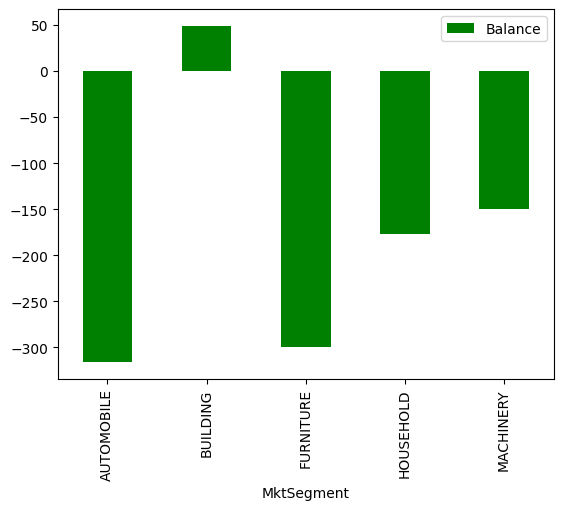

In [13]:
with warnings.catch_warnings():
  warnings.simplefilter('ignore')
    
  cur.execute(stmt)
  rows = cur.fetchall()
  df = pd.DataFrame(rows,columns=['MktSegment','Balance'])
  df.plot(x="MktSegment", y=['Balance' ], kind="bar",color = ['green'])

In [14]:
with warnings.catch_warnings():
  warnings.simplefilter('ignore')

  cur.execute(stmt)
  rows = cur.fetchall()
  df = pd.DataFrame(rows,columns=['MktSegment','Balance'])
df

,MktSegment,Balance
0,AUTOMOBILE,-315.65335
1,BUILDING,48.86500
2,FURNITURE,-299.15002
3,HOUSEHOLD,-177.37857
4,MACHINERY,-149.35000


In [15]:
%%presto iceberg_data retail
insert into customer select * from tpch.tiny.customer limit 20;

Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.
Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.


presto:retail> insert into customer select * from tpch.tiny.customer limit 20; 
INSERT: 20 rows

Query 20230821_131028_00374_egdc7, FINISHED, 1 node
Splits: 39 total, 39 done (100.00%)
0:02 [1.5K rows, 0B] [880 rows/s, 0B/s]

presto:retail> 


In [16]:
%%presto iceberg_data
SELECT count(*) FROM retail.customer;

Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.
Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.


presto> SELECT count(*) FROM retail.customer; 
 _col0 
-------
    40 
(1 row)

Query 20230821_131034_00377_egdc7, FINISHED, 1 node
Splits: 19 total, 19 done (100.00%)
0:01 [40 rows, 5.74KB] [51 rows/s, 7.43KB/s]

presto> 


In [17]:
%%presto iceberg_data
SELECT * FROM retail.\"customer\$snapshots\" ORDER BY committed_at;

Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.
Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.


presto> SELECT * FROM retail."customer$snapshots" ORDER BY committed_at; 
        committed_at         |     snapshot_id     |      parent_id      | operation |                                                manifest_list                                                |                                                                                                             summary                                                                                                             
-----------------------------+---------------------+---------------------+-----------+-------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 2023-08-21 13:09:31.344 UTC | 1408000380840053056 | NULL                | append 

In [18]:
%%presto iceberg_data
SELECT * FROM retail.\"customer\$partitions\";

Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.
Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.


presto> SELECT * FROM retail."customer$partitions"; 
 row_count | file_count | total_size |            custkey             |                            name                            |                          address                           |           nationkey           |                          phone                           |                 acctbal                  |                  mktsegment                   |                          comment                           
-----------+------------+------------+--------------------------------+------------------------------------------------------------+------------------------------------------------------------+-------------------------------+----------------------------------------------------------+------------------------------------------+-----------------------------------------------+------------------------------------------------------------
        40 |          2 |       5873 | {min=1, max=395, null_count=0} | {mi

In [19]:
%%presto iceberg_data
SELECT * FROM retail.\"customer\$manifests\";

Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.
Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.


presto> SELECT * FROM retail."customer$manifests"; 
                                        path                                         | length | partition_spec_id |  added_snapshot_id  | added_data_files_count | existing_data_files_count | deleted_data_files_count | partitions 
-------------------------------------------------------------------------------------+--------+-------------------+---------------------+------------------------+---------------------------+--------------------------+------------
 s3a://iceberg-bucket/customer/metadata/7ce904bb-56f2-4a81-a363-39f0ce2f0db0-m0.avro |   6329 |                 0 | 6837491818340796149 |                      1 |                         0 |                        0 | []         
 s3a://iceberg-bucket/customer/metadata/22528304-d1d2-4bcd-9068-840a1e07d65a-m0.avro |   6323 |                 0 | 1408000380840053056 |                      1 |                         0 |                        0 | []         
(2 rows)

Query 20230821_131

In [20]:
%%presto iceberg_data
SELECT * FROM retail.\"customer\$files\";

Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.
Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.


presto> SELECT * FROM retail."customer$files"; 
 content |                                    file_path                                    | file_format | record_count | file_size_in_bytes |                      column_sizes                       |                   value_counts                   |            null_value_counts             | nan_value_counts |                                                     lower_bounds                                                     |                                                     upper_bounds                                                     | key_metadata | split_offsets | equality_ids 
---------+---------------------------------------------------------------------------------+-------------+--------------+--------------------+---------------------------------------------------------+--------------------------------------------------+------------------------------------------+------------------+------------------------------------------

In [21]:
%%presto iceberg_data
SELECT * FROM retail.\"customer\$snapshots\" ORDER BY committed_at;

Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.
Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.


presto> SELECT * FROM retail."customer$snapshots" ORDER BY committed_at; 
Query 20230821_131100_00382_egdc7 [WAITING_FOR_PREREQUISITES] i[0 0B 0B] o[0 0B 0B] splits[0/0/0]        committed_at         |     snapshot_id     |      parent_id      | operation |                                                manifest_list                                                |                                                                                                             summary                                                                                                             
-----------------------------+---------------------+---------------------+-----------+-------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [22]:
%%presto iceberg_data
CALL iceberg_data.system.rollback_to_snapshot('retail','customer',4018270240758327620);

Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.
Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.


presto> CALL iceberg_data.system.rollback_to_snapshot('retail','customer',4018270240758327620); 
Query 20230821_131106_00383_egdc7 failed: Cannot roll back to unknown snapshot id: 4018270240758327620

presto> 


In [23]:
%%presto iceberg_data retail
select count(*) from customer;

Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.
Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.


presto:retail> select count(*) from customer; 
 _col0 
-------
    40 
(1 row)

Query 20230821_131110_00385_egdc7, FINISHED, 1 node
Splits: 19 total, 19 done (100.00%)
0:01 [40 rows, 5.74KB] [33 rows/s, 4.8KB/s]

presto:retail> 


In [24]:
%%presto iceberg_data
SELECT * FROM retail.\"customer\$history\";

Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.
Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.


presto> SELECT * FROM retail."customer$history"; 
       made_current_at       |     snapshot_id     |      parent_id      | is_current_ancestor 
-----------------------------+---------------------+---------------------+---------------------
 2023-08-21 13:09:31.344 UTC | 1408000380840053056 | NULL                | true                
 2023-08-21 13:10:29.569 UTC | 6837491818340796149 | 1408000380840053056 | true                
(2 rows)

Query 20230821_131115_00386_egdc7, FINISHED, 1 node
Splits: 17 total, 17 done (100.00%)
0:01 [2 rows, 42B] [1 rows/s, 31B/s]

presto> 


In [25]:
%%presto iceberg_data
drop table if exists retail.customer;
drop schema if exists retail;

Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.
Emulate Docker CLI using podman. Create /etc/containers/nodocker to quiet msg.


presto> drop table if exists retail.customer; drop schema if exists retail; 
DROP TABLE
DROP SCHEMA
presto> 
